In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
wdi_df = pd.read_excel("wdi.xlsx")

In [3]:
wdi_df.head()

,Country Name,Country Code,Income Lv.,Series Name,Series Code,2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023]
0,Afghanistan,AFG,Low income,"Prevalence of stunting, height for age (modele...",SH.STA.STNT.ME.ZS,48.9,47.4,45.8,44.3,42.9,41.6,40.5,39.4,38.3,37.2,36.1,35.1,34,33.1,..
1,Afghanistan,AFG,Low income,"Prevalence of overweight (modeled estimate, % ...",SH.STA.OWGH.ME.ZS,5.2,5.2,5.1,5,4.9,4.8,4.7,4.5,4.4,4.2,4.1,4,3.8,3.7,..
2,Afghanistan,AFG,Low income,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,60.364,60.851,61.419,61.923,62.417,62.545,62.659,63.136,63.016,63.081,63.565,62.575,61.982,62.879,..
3,Afghanistan,AFG,Low income,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,21.390528,14.362441,0.426355,12.752287,5.600745,2.724543,1.451315,2.260314,2.647003,1.189228,3.911603,-2.351101,-20.738839,-6.240172,..
4,Afghanistan,AFG,Low income,GDP (current US$),NY.GDP.MKTP.CD,12416152732.056717,15856668555.833595,17805098206.314083,19907329777.587166,20146416757.598675,20497128555.697231,19134221644.732494,18116572395.077213,18753456497.815865,18053222687.412624,18799444490.112782,19955929052.149597,14266499429.874573,14502158192.090395,..


In [4]:
#We will only use last 10 years from 2022 dataset

wdi_df.drop(columns = ['2009 [YR2009]','2010 [YR2010]','2011 [YR2011]','2012 [YR2012]','2023 [YR2023]'], inplace=True)

In [5]:
#Checking null values
wdi_df.replace("..", np.nan, inplace=True)

year_columns = ['2013 [YR2013]','2014 [YR2014]','2015 [YR2015]','2016 [YR2016]','2017 [YR2017]','2018 [YR2018]','2019 [YR2019]','2020 [YR2020]','2021 [YR2021]','2022 [YR2022]']

wdi_df['null values'] = wdi_df[year_columns].isnull().any(axis=1)

In [7]:
#Cleaning out null values

cleaned_wdi_df = wdi_df[wdi_df['null values'] == False]

In [ ]:
display(cleaned_wdi_df)

In [ ]:
#Reshaping Data

In [9]:
#Turn year into columns
reshaped_wdi_df = cleaned_wdi_df.melt(id_vars = ['Country Name','Country Code','Income Lv.','Series Name','Series Code'], value_vars = ['2013 [YR2013]','2014 [YR2014]','2015 [YR2015]','2016 [YR2016]','2017 [YR2017]','2018 [YR2018]','2019 [YR2019]','2020 [YR2020]','2021 [YR2021]','2022 [YR2022]'],
                     var_name = 'Year', value_name = 'Value')

In [11]:
display(reshaped_wdi_df)

,Country Name,Country Code,Income Lv.,Series Name,Series Code,Year,Value
0,Afghanistan,AFG,Low income,"Prevalence of stunting, height for age (modele...",SH.STA.STNT.ME.ZS,2013 [YR2013],4.290000e+01
1,Afghanistan,AFG,Low income,"Prevalence of overweight (modeled estimate, % ...",SH.STA.OWGH.ME.ZS,2013 [YR2013],4.900000e+00
2,Afghanistan,AFG,Low income,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,2013 [YR2013],6.241700e+01
3,Afghanistan,AFG,Low income,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,2013 [YR2013],5.600745e+00
4,Afghanistan,AFG,Low income,GDP (current US$),NY.GDP.MKTP.CD,2013 [YR2013],2.014642e+10
...,...,...,...,...,...,...,...
9525,World,WLD,World,"Prevalence of stunting, height for age (modele...",SH.STA.STNT.ME.ZS,2022 [YR2022],2.234000e+01
9526,World,WLD,World,"Prevalence of overweight (modeled estimate, % ...",SH.STA.OWGH.ME.ZS,2022 [YR2022],5.590000e+00
9527,World,WLD,World,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,2022 [YR2022],7.199635e+01
9528,World,WLD,World,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,2022 [YR2022],3.089607e+00


In [12]:
#Pivot for Series Name
pivot_wdi_df = reshaped_wdi_df.pivot(index=['Country Name', 'Country Code', 'Income Lv.', 'Year'], 
                    columns='Series Name', 
                    values='Value')

pivot_wdi_df.reset_index(inplace = True)

In [ ]:
display(pivot_wdi_df)

In [15]:
#Convert Year
pivot_wdi_df['Year'] = pivot_wdi_df['Year'].str.extract('(\d{4})').astype(int)

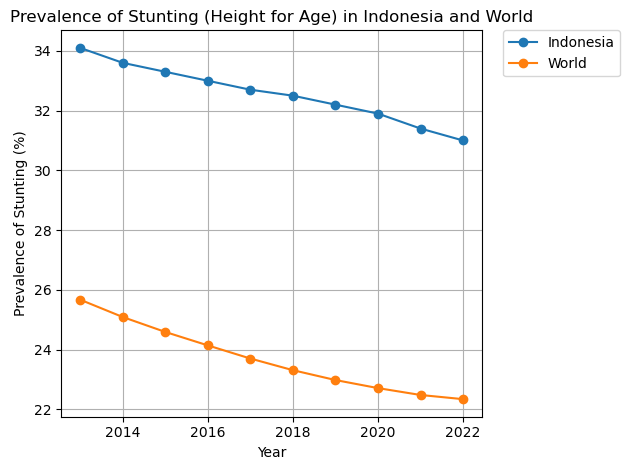

In [20]:
#Compare Indonesia Stunting Rate to World

indonesia_df = pivot_wdi_df[(pivot_wdi_df['Country Name'] == 'Indonesia')]
world_df = pivot_wdi_df[(pivot_wdi_df['Country Name'] == 'World')]

#Select only needed columns

indonesia_stunting = indonesia_df[['Year','Prevalence of stunting, height for age (modeled estimate, % of children under 5)']]
world_stunting = world_df[['Year','Prevalence of stunting, height for age (modeled estimate, % of children under 5)']]


#Plot Line
plt.plot(indonesia_stunting['Year'], indonesia_stunting['Prevalence of stunting, height for age (modeled estimate, % of children under 5)'], label='Indonesia', marker='o')

plt.plot(world_stunting['Year'], world_stunting['Prevalence of stunting, height for age (modeled estimate, % of children under 5)'], label='World', marker='o')

#Add Label and Title
plt.xlabel('Year')
plt.ylabel('Prevalence of Stunting (%)')
plt.title('Prevalence of Stunting (Height for Age) in Indonesia and World')
plt.legend()

#Final Plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
#While Indonesia is seeing steady improvement in stunting rates, it remaing above the global average, highliting the need for continued focus on nutritional interventions

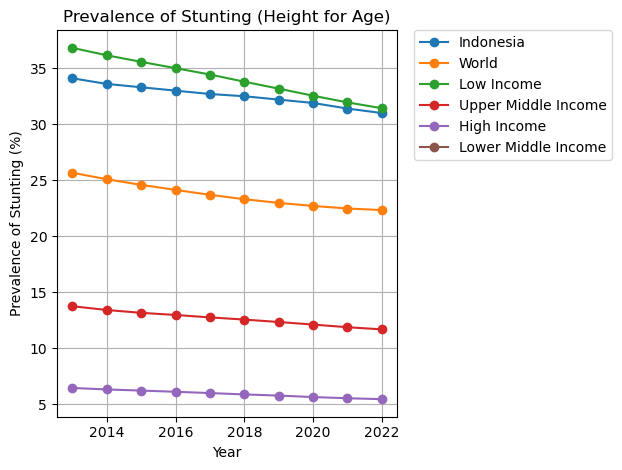

In [19]:
#Compare stunting rate in Indonesia and other country based on Income Level

low_df = pivot_wdi_df[(pivot_wdi_df['Income Lv.'] == 'Low income')]
upper_middle_df = pivot_wdi_df[(pivot_wdi_df['Income Lv.'] == 'Upper middle income')]
high_df = pivot_wdi_df[(pivot_wdi_df['Income Lv.'] == 'High income')]
lower_middle_df = pivot_wdi_df[(pivot_wdi_df['Income Lv.'] == 'Low middle income')]

#Select only needed columns

low_stunting = low_df.groupby('Year')['Prevalence of stunting, height for age (modeled estimate, % of children under 5)'].mean().reset_index()
upper_middle_stunting = upper_middle_df.groupby('Year')['Prevalence of stunting, height for age (modeled estimate, % of children under 5)'].mean().reset_index()
high_stunting = high_df.groupby('Year')['Prevalence of stunting, height for age (modeled estimate, % of children under 5)'].mean().reset_index()
lower_middle_stunting = lower_middle_df.groupby('Year')['Prevalence of stunting, height for age (modeled estimate, % of children under 5)'].mean().reset_index()


#Plot Line
plt.plot(indonesia_stunting['Year'], indonesia_stunting['Prevalence of stunting, height for age (modeled estimate, % of children under 5)'], label='Indonesia', marker='o')
plt.plot(world_stunting['Year'], world_stunting['Prevalence of stunting, height for age (modeled estimate, % of children under 5)'], label='World', marker='o')
plt.plot(low_stunting['Year'], low_stunting['Prevalence of stunting, height for age (modeled estimate, % of children under 5)'], label='Low Income', marker='o')
plt.plot(upper_middle_stunting['Year'], upper_middle_stunting['Prevalence of stunting, height for age (modeled estimate, % of children under 5)'], label='Upper Middle Income', marker='o')
plt.plot(high_stunting['Year'], high_stunting['Prevalence of stunting, height for age (modeled estimate, % of children under 5)'], label='High Income', marker='o')
plt.plot(lower_middle_stunting['Year'], lower_middle_stunting['Prevalence of stunting, height for age (modeled estimate, % of children under 5)'], label='Lower Middle Income', marker='o')

#Add Label and Title
plt.xlabel('Year')
plt.ylabel('Prevalence of Stunting (%)')
plt.title('Prevalence of Stunting (Height for Age)')
plt.legend()

#Final Plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
#Indonesia was classified by World Bank as Upper Middle Income. Despite Indonesia being classified as an Upper Middle Income country (shown in red), the stunting rate in Indonesia (in blue) is significantly higher than the average for countries in this income group
#This is show that while Indonesia has made strides in economic development, high stunting rate underscores the critical need for further intervention in child nutrition and health care

In [ ]:
#Importing Human Development Index dataset

In [21]:
hdi_df = pd.read_excel('hdi.xlsx')

In [ ]:
#Joining both tables

In [ ]:
#Before merging the tables, it's important to verify the integrity and consistency of the key columns that will be used for the join
#We will used only 2022 data

In [30]:
#Check null values in 2022 data
wdi_df['2022 null'] = wdi_df['2022 [YR2022]'].isnull()

#Filter null values in 2022 data
cleaned_wdi_2022_df = wdi_df[wdi_df['2022 null'] == False]

#Drop other columns
cleaned_wdi_2022_df.drop(columns = ['2013 [YR2013]','2014 [YR2014]','2015 [YR2015]','2016 [YR2016]','2017 [YR2017]','2018 [YR2018]','2019 [YR2019]','2020 [YR2020]',
                                   '2021 [YR2021]'], inplace=True)

/var/folders/jd/zh0k3k1x0xqct6rxmrl2bndr0000gn/T/ipykernel_98219/3292989265.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_wdi_2022_df.drop(columns = ['2013 [YR2013]','2014 [YR2014]','2015 [YR2015]','2016 [YR2016]','2017 [YR2017]','2018 [YR2018]','2019 [YR2019]','2020 [YR2020]',


In [32]:
#Pivot the 2022 value
pivot_wdi_2022_df = cleaned_wdi_2022_df.pivot(index=['Country Name', 'Country Code', 'Income Lv.'], 
                    columns='Series Name', 
                    values='2022 [YR2022]')

pivot_wdi_2022_df.reset_index(inplace = True)

,Country Name,Country Code,Income Lv.,Series Name,Series Code,2022 [YR2022],null values,2022 null
0,Afghanistan,AFG,Low income,"Prevalence of stunting, height for age (modele...",SH.STA.STNT.ME.ZS,3.310000e+01,False,False
1,Afghanistan,AFG,Low income,"Prevalence of overweight (modeled estimate, % ...",SH.STA.OWGH.ME.ZS,3.700000e+00,False,False
2,Afghanistan,AFG,Low income,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,6.287900e+01,False,False
3,Afghanistan,AFG,Low income,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,-6.240172e+00,False,False
4,Afghanistan,AFG,Low income,GDP (current US$),NY.GDP.MKTP.CD,1.450216e+10,False,False
...,...,...,...,...,...,...,...,...
1302,World,WLD,World,"Prevalence of stunting, height for age (modele...",SH.STA.STNT.ME.ZS,2.234000e+01,False,False
1303,World,WLD,World,"Prevalence of overweight (modeled estimate, % ...",SH.STA.OWGH.ME.ZS,5.590000e+00,False,False
1304,World,WLD,World,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,7.199635e+01,False,False
1305,World,WLD,World,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,3.089607e+00,False,False


In [37]:
#Check unique country name value in each dataset

#World Development Index Data
wdi_2022_df_country = pivot_wdi_2022_df['Country Name'].unique()
wdi_2022_df_country = np.sort(wdi_2022_df_country)
print(wdi_2022_df_country)

#Human Development Index Data
country_hdi = hdi_df['Country'].unique()
country_hdi = np.sort(country_hdi)
print(country_hdi)

['Afghanistan' 'Albania' 'Algeria' 'American Samoa' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas, The' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan' 'Bolivia'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'British Virgin Islands'
 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cabo Verde'
 'Cambodia' 'Cameroon' 'Canada' 'Cayman Islands'
 'Central African Republic' 'Chad' 'Channel Islands' 'Chile' 'China'
 'Colombia' 'Comoros' 'Congo, Dem. Rep.' 'Congo, Rep.' 'Costa Rica'
 "Cote d'Ivoire" 'Croatia' 'Cuba' 'Curacao' 'Cyprus' 'Czechia' 'Denmark'
 'Djibouti' 'Dominica' 'Dominican Republic' 'Ecuador' 'Egypt, Arab Rep.'
 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini'
 'Ethiopia' 'Faroe Islands' 'Fiji' 'Finland' 'France' 'French Polynesia'
 'Gabon' 'Gambia, The' 'Georgia' 'Germany' 'Ghana' 'Gibraltar' 'Greece'
 'Greenland' 'Grenada' 'Guam' 'Guatemala

In [38]:
#We see there is a country with different country name writting. First we will adjust the Human Development Index (HDI) data to World Development Index (WDI) data

#Change array to dataset
country_hdi_df = pd.DataFrame(country_hdi, columns=['Country'])
country_wdi_df = pd.DataFrame(wdi_2022_df_country, columns = ['Country Name'])

In [40]:
#Check missing countries in WDI data

missing_countries = country_hdi_df[~country_hdi_df['Country'].isin(country_wdi_df['Country Name'])]

# Print countries in country_hdi_df that are not present in country_df
print("Countries in country_hdi_df not found in country_df:")
print(missing_countries)

Countries in country_hdi_df not found in country_df:
                                Country
11                              Bahamas
20     Bolivia (Plurinational State of)
38                                Congo
39   Congo (Democratic Republic of the)
45                        Côte d'Ivoire
51                                Egypt
56                Eswatini (Kingdom of)
62                               Gambia
74               Hong Kong, China (SAR)
79           Iran (Islamic Republic of)
90                  Korea (Republic of)
92                           Kyrgyzstan
93     Lao People's Democratic Republic
112    Micronesia (Federated States of)
113               Moldova (Republic of)
132                 Palestine, State of
144               Saint Kitts and Nevis
145                         Saint Lucia
146    Saint Vincent and the Grenadines
148                          San Marino
156                            Slovakia
170       Tanzania (United Republic of)
179                        

In [44]:
#Change HDI data to WDI
country_hdi_df['Country'] = country_hdi_df['Country'].replace({'Bahamas': 'Bahamas, The','Bolivia (Plurinational State of)': 'Bolivia','Congo': 'Congo, Rep.',
                                                               'Congo (Democratic Republic of the)': 'Congo, Dem. Rep.',"Côte d'Ivoire":"Cote d'Ivoire","Egypt":"Egypt, Arab Rep.",
                                                               'Eswatini (Kingdom of)':'Eswatini','Gambia':'Gambia, The','Hong Kong, China (SAR)':'Hong Kong SAR, China',
                                                               'Iran (Islamic Republic of)':'Iran, Islamic Rep.','Korea (Republic of)':'Korea, Rep.','Kyrgyzstan':'Kyrgyz Republic',
                                                               "Lao People's Democratic Republic":'Lao PDR','Micronesia (Federated States of)':'Micronesia, Fed. Sts.',
                                                               'Moldova (Republic of)':'Moldova','Saint Kitts and Nevis':'St. Kitts and Nevis','Saint Lucia':'St. Lucia',
                                                               'Saint Vincent and the Grenadines':'St. Vincent and the Grenadines','Slovakia':'Slovak Republic',
                                                               'Tanzania (United Republic of)':'Tanzania','Türkiye':'Turkiye','Venezuela (Bolivarian Republic of)':'Venezuela, RB',
                                                               'Yemen':'Yemen, Rep.'})                          

In [45]:
#Check missing country again
missing_countries = country_hdi_df[~country_hdi_df['Country'].isin(country_wdi_df['Country Name'])]

# Print countries in country_hdi_df that are not present in country_df
print("Countries in country_hdi_df not found in country_df:")
print(missing_countries)

Countries in country_hdi_df not found in country_df:
                 Country
132  Palestine, State of
148           San Marino


In [56]:
#Remaining countries might not because it's not lised in WDI dataset
#Now we can change the country name in HDI dataset

hdi_df['Country'] = hdi_df['Country'].replace({'Bahamas': 'Bahamas, The','Bolivia (Plurinational State of)': 'Bolivia','Congo': 'Congo, Rep.',
                                               'Congo (Democratic Republic of the)': 'Congo, Dem. Rep.',"Côte d'Ivoire":"Cote d'Ivoire","Egypt":"Egypt, Arab Rep.",
                                               'Eswatini (Kingdom of)':'Eswatini','Gambia':'Gambia, The','Hong Kong, China (SAR)':'Hong Kong SAR, China',
                                               'Iran (Islamic Republic of)':'Iran, Islamic Rep.','Korea (Republic of)':'Korea, Rep.','Kyrgyzstan':'Kyrgyz Republic',
                                               "Lao People's Democratic Republic":'Lao PDR','Micronesia (Federated States of)':'Micronesia, Fed. Sts.',
                                               'Moldova (Republic of)':'Moldova','Saint Kitts and Nevis':'St. Kitts and Nevis','Saint Lucia':'St. Lucia',
                                               'Saint Vincent and the Grenadines':'St. Vincent and the Grenadines','Slovakia':'Slovak Republic',
                                               'Tanzania (United Republic of)':'Tanzania','Türkiye':'Turkiye','Venezuela (Bolivarian Republic of)':'Venezuela, RB',
                                               'Yemen':'Yemen, Rep.'})
hdi_df = hdi_df.rename(columns = {'Country':'Country Name'})
hdi_df = hdi_df.rename(columns = {'Human Development Index (HDI)  ':'Human Development Index'})

In [49]:
display(pivot_wdi_2022_df)

Series Name,Country Name,Country Code,Income Lv.,Current health expenditure (% of GDP),GDP (current US$),GDP growth (annual %),"Life expectancy at birth, total (years)","Prevalence of overweight (modeled estimate, % of children under 5)","Prevalence of stunting, height for age (modeled estimate, % of children under 5)"
0,Afghanistan,AFG,Low income,NaN,1.450216e+10,-6.240172,62.879000,3.70,33.10
1,Albania,ALB,Upper middle income,NaN,1.891638e+10,4.856402,76.833000,13.40,8.30
2,Algeria,DZA,Upper middle income,NaN,2.255603e+11,3.600000,77.129000,11.90,8.60
3,American Samoa,ASM,High income,NaN,8.710000e+08,1.735016,NaN,NaN,NaN
4,Andorra,AND,High income,NaN,3.380602e+09,9.563798,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
211,West Bank and Gaza,PSE,Lower middle income,NaN,1.916550e+10,4.082760,73.444000,8.30,7.50
212,World,WLD,World,NaN,1.012251e+14,3.089607,71.996352,5.59,22.34
213,"Yemen, Rep.",YEM,Low income,NaN,NaN,NaN,63.720000,1.70,35.10
214,Zambia,ZMB,Lower middle income,NaN,2.916378e+10,5.249622,61.803000,5.40,31.40


In [64]:
final_df = pd.merge(pivot_wdi_2022_df, hdi_df, on = 'Country Name', how = 'left')

In [65]:
display(final_df)

,Country Name,Country Code,Income Lv.,Current health expenditure (% of GDP),GDP (current US$),GDP growth (annual %),"Life expectancy at birth, total (years)","Prevalence of overweight (modeled estimate, % of children under 5)","Prevalence of stunting, height for age (modeled estimate, % of children under 5)",No,Human Development Index,HDI rank
0,Afghanistan,AFG,Low income,NaN,1.450216e+10,-6.240172,62.879000,3.70,33.10,182.0,0.462,182.0
1,Albania,ALB,Upper middle income,NaN,1.891638e+10,4.856402,76.833000,13.40,8.30,74.0,0.789,74.0
2,Algeria,DZA,Upper middle income,NaN,2.255603e+11,3.600000,77.129000,11.90,8.60,93.0,0.745,93.0
3,American Samoa,ASM,High income,NaN,8.710000e+08,1.735016,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,AND,High income,NaN,3.380602e+09,9.563798,NaN,NaN,NaN,35.0,0.884,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...
211,West Bank and Gaza,PSE,Lower middle income,NaN,1.916550e+10,4.082760,73.444000,8.30,7.50,NaN,NaN,NaN
212,World,WLD,World,NaN,1.012251e+14,3.089607,71.996352,5.59,22.34,NaN,NaN,NaN
213,"Yemen, Rep.",YEM,Low income,NaN,NaN,NaN,63.720000,1.70,35.10,186.0,0.424,186.0
214,Zambia,ZMB,Lower middle income,NaN,2.916378e+10,5.249622,61.803000,5.40,31.40,153.0,0.569,153.0


In [70]:
print(final_df.columns)

Index(['Country Name', 'Country Code', 'Income Lv.',
       'Current health expenditure (% of GDP)', 'GDP (current US$)',
       'GDP growth (annual %)', 'Life expectancy at birth, total (years)',
       'Prevalence of overweight (modeled estimate, % of children under 5)',
       'Prevalence of stunting, height for age (modeled estimate, % of children under 5)',
       'No', 'Human Development Index', 'HDI rank'],
      dtype='object')


In [98]:
#We will see correlation between Prevalence of stunting with GDP, GDP Growth, Life expectancy at birth, and Human Development Index
#We need to filter in where either both column have null values

filtered_final_df = final_df[final_df['Prevalence of stunting, height for age (modeled estimate, % of children under 5)'].notnull()]
filtered_final_df = filtered_final_df[final_df['Human Development Index'].notnull()]
filtered_final_df = filtered_final_df[final_df['GDP (current US$)'].notnull()]

/var/folders/jd/zh0k3k1x0xqct6rxmrl2bndr0000gn/T/ipykernel_98219/965681272.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_final_df = filtered_final_df[final_df['Human Development Index'].notnull()]
/var/folders/jd/zh0k3k1x0xqct6rxmrl2bndr0000gn/T/ipykernel_98219/965681272.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_final_df = filtered_final_df[final_df['GDP (current US$)'].notnull()]


In [81]:
display(filtered_final_df)

,Country Name,Country Code,Income Lv.,Current health expenditure (% of GDP),GDP (current US$),GDP growth (annual %),"Life expectancy at birth, total (years)","Prevalence of overweight (modeled estimate, % of children under 5)","Prevalence of stunting, height for age (modeled estimate, % of children under 5)",No,Human Development Index,HDI rank
0,Afghanistan,AFG,Low income,NaN,1.450216e+10,-6.240172,62.879,3.7,33.1,182.0,0.462,182.0
1,Albania,ALB,Upper middle income,NaN,1.891638e+10,4.856402,76.833,13.4,8.3,74.0,0.789,74.0
2,Algeria,DZA,Upper middle income,NaN,2.255603e+11,3.600000,77.129,11.9,8.6,93.0,0.745,93.0
5,Angola,AGO,Lower middle income,NaN,1.043997e+11,3.045403,61.929,3.9,43.6,150.0,0.591,150.0
7,Argentina,ARG,Upper middle income,NaN,6.311334e+11,4.956370,76.064,12.6,9.5,48.0,0.849,48.0
...,...,...,...,...,...,...,...,...,...,...,...,...
208,"Venezuela, RB",VEN,Not Classified,NaN,NaN,NaN,71.105,6.9,10.5,119.0,0.699,119.0
209,Viet Nam,VNM,Lower middle income,NaN,4.103240e+11,8.123514,74.580,8.1,19.3,107.0,0.726,107.0
213,"Yemen, Rep.",YEM,Low income,NaN,NaN,NaN,63.720,1.7,35.1,186.0,0.424,186.0
214,Zambia,ZMB,Lower middle income,NaN,2.916378e+10,5.249622,61.803,5.4,31.4,153.0,0.569,153.0


In [82]:
#Drop unnecessary column

filtered_final_df.drop(columns = ['Country Code','Current health expenditure (% of GDP)','Prevalence of overweight (modeled estimate, % of children under 5)','No','HDI rank'], inplace=True)

In [99]:
#log gdp value as the distribution is very skewed
filtered_final_df['GDP log'] = np.log(filtered_final_df['GDP (current US$)'])

In [100]:
display(filtered_final_df)

,Country Name,Country Code,Income Lv.,Current health expenditure (% of GDP),GDP (current US$),GDP growth (annual %),"Life expectancy at birth, total (years)","Prevalence of overweight (modeled estimate, % of children under 5)","Prevalence of stunting, height for age (modeled estimate, % of children under 5)",No,Human Development Index,HDI rank,GDP log
0,Afghanistan,AFG,Low income,NaN,1.450216e+10,-6.240172,62.879,3.7,33.1,182.0,0.462,182.0,23.397563
1,Albania,ALB,Upper middle income,NaN,1.891638e+10,4.856402,76.833,13.4,8.3,74.0,0.789,74.0,23.663294
2,Algeria,DZA,Upper middle income,NaN,2.255603e+11,3.600000,77.129,11.9,8.6,93.0,0.745,93.0,26.141853
5,Angola,AGO,Lower middle income,NaN,1.043997e+11,3.045403,61.929,3.9,43.6,150.0,0.591,150.0,25.371493
7,Argentina,ARG,Upper middle income,NaN,6.311334e+11,4.956370,76.064,12.6,9.5,48.0,0.849,48.0,27.170783
...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,Uzbekistan,UZB,Lower middle income,NaN,8.114082e+10,5.668817,71.674,4.2,6.9,106.0,0.727,106.0,25.119452
207,Vanuatu,VUT,Lower middle income,NaN,1.022219e+09,1.916057,70.492,5.1,31.4,140.0,0.614,140.0,20.745242
209,Viet Nam,VNM,Lower middle income,NaN,4.103240e+11,8.123514,74.580,8.1,19.3,107.0,0.726,107.0,26.740213
214,Zambia,ZMB,Lower middle income,NaN,2.916378e+10,5.249622,61.803,5.4,31.4,153.0,0.569,153.0,24.096193


In [102]:
#Adjust the legend. Change Indonesia in Income Lv. to Indonesia
def assign_value(row):
    if row['Country Name'] == 'Indonesia':
        return 'Indonesia'
    else:
        return row['Income Lv.']

# Apply the function to the DataFrame
filtered_final_df['Legend'] = filtered_final_df.apply(assign_value, axis=1)

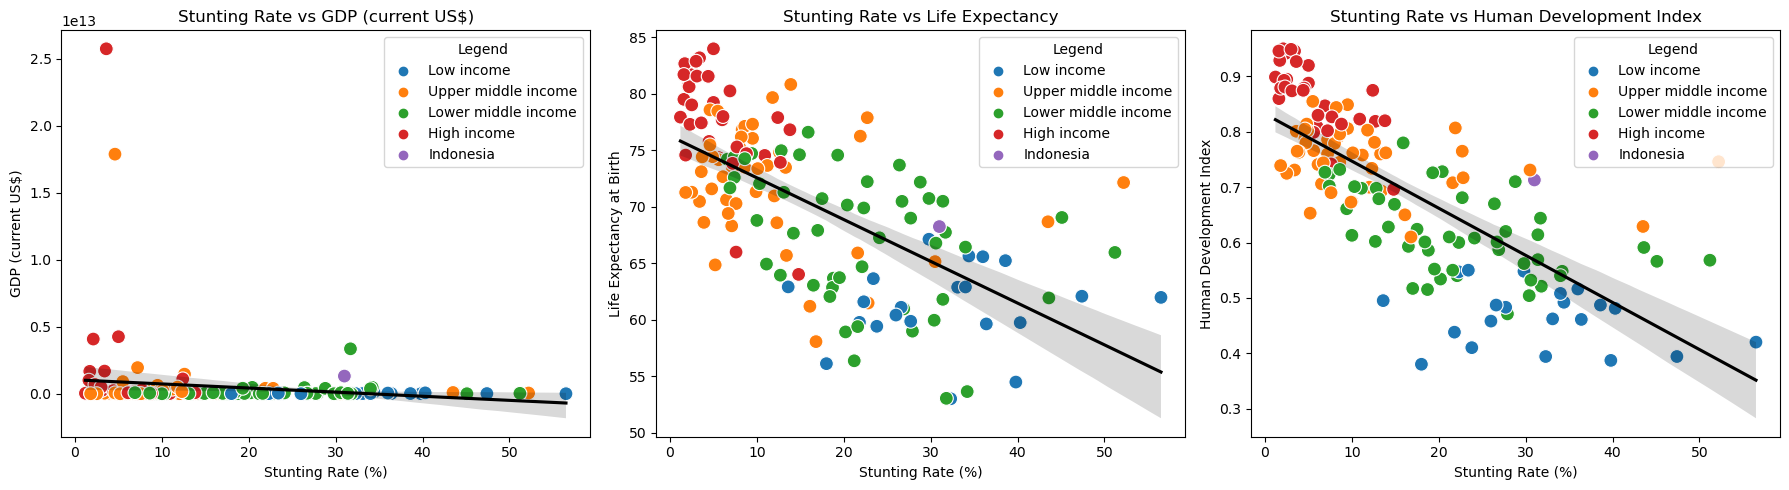

In [115]:
#We'll do the correlation analysis by visualizing stunting rate with others metrics using scatter plot
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Scatter Plot: Stunting vs GDP
sns.scatterplot(x='Prevalence of stunting, height for age (modeled estimate, % of children under 5)', y='GDP (current US$)', data=filtered_final_df, ax=axes[0], hue='Legend', s=100)
ax1 = plt.subplot(1, 3, 1)
sns.regplot(x='Prevalence of stunting, height for age (modeled estimate, % of children under 5)', y='GDP (current US$)', data=filtered_final_df, scatter=False, ax=ax1, line_kws={"color":"black"})
axes[0].set_title('Stunting Rate vs GDP (current US$)')
axes[0].set_xlabel('Stunting Rate (%)')
axes[0].set_ylabel('GDP (current US$)')

# Scatter Plot: Stunting vs Life Expectancy
sns.scatterplot(x='Prevalence of stunting, height for age (modeled estimate, % of children under 5)', y='Life expectancy at birth, total (years)', data=filtered_final_df, ax=axes[1], hue='Legend', s=100)
ax1 = plt.subplot(1, 3, 2)
sns.regplot(x='Prevalence of stunting, height for age (modeled estimate, % of children under 5)', y='Life expectancy at birth, total (years)', data=filtered_final_df, scatter=False, ax=ax1, line_kws={"color":"black"})
axes[1].set_title('Stunting Rate vs Life Expectancy')
axes[1].set_xlabel('Stunting Rate (%)')
axes[1].set_ylabel('Life Expectancy at Birth')

# Scatter Plot: Stunting vs Human Development Index
sns.scatterplot(x='Prevalence of stunting, height for age (modeled estimate, % of children under 5)', y='Human Development Index', data=filtered_final_df, ax=axes[2], hue='Legend', s=100)
ax1 = plt.subplot(1, 3, 3)
sns.regplot(x='Prevalence of stunting, height for age (modeled estimate, % of children under 5)', y='Human Development Index', data=filtered_final_df, scatter=False, ax=ax1, line_kws={"color":"black"})
axes[2].set_title('Stunting Rate vs Human Development Index')
axes[2].set_xlabel('Stunting Rate (%)')
axes[2].set_ylabel('Human Development Index')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
#High stunting rates tend to lower life expectancies and lower human development index, suggesting that improving childhood nutrition could positively influence overall human development and improving long-term health outcomes
#But stunting rate doesn't really have an impact of higher GDP.

In [ ]:
#For Indonesia, the data highlights the critical need for interventions to reduce stunting, which would likely lead to improvements in life expectancy and human development